In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.

In [2]:
df = pd.read_csv('data/naver_openapi_json.csv')
df

,title,description,pubDate
0,교육시설·대단지 아파트 배후수요 기대 '동래 아크로폴리스 상가',코로나19로 단축운영 되다 올해 준공으로 새롭게 분양된다. 총 344평의 대지면적으...,"Fri, 04 Mar 2022 10:00:00 +0900"
1,"부산은행, 저소득가정 학생에 디지털기기·학용품 후원",안전우산 지원 △활주로형 횡단보도 설치 등의 사업도 추진했다. 올해는 급증하는 코로...,"Fri, 04 Mar 2022 10:00:00 +0900"
2,음식점·카페 내일부터 밤 11시까지…의료계 “정책 판단 아쉬워”,전 장관은 “수도권과 비수도권 지역 모두 코로나19 위험도가 높음 수준을 이어가고 ...,"Fri, 04 Mar 2022 10:00:00 +0900"
3,"홍남기 ""유류세 인하 7월까지 연장""...인하폭 확대 검토",가공식품·외식업계 비용 부담 완화를 위해 사료·식품 원료구매자금 금리를 각각 0.5...,"Fri, 04 Mar 2022 10:00:00 +0900"
4,"KT, 우수 대리점 발굴 활성화",이번 협약은 코로나로 침체된 유무선 시장 활성화와 좋은 일자리를 창출하는 대리점 확...,"Fri, 04 Mar 2022 10:00:00 +0900"
...,...,...,...
995,유선 ‘지구인 더 하우스’로 단독 MC 데뷔…15일 첫방송(공식입장),오는 3월 15일 오후 8시 10분으로 편성을 확정한 ‘지구인 더 하우스’는 코로나...,"Fri, 04 Mar 2022 09:55:00 +0900"
996,코로나19 신규 확진 26만명 돌파,코로나19 신규 확진자 수가 26만 6853명을 기록한 4일 서울역 임시선별검사소에...,"Fri, 04 Mar 2022 09:55:00 +0900"
997,"NH농협생명, 출범 10주년 맞아 새 비전 선포",신비전 선포식은 코로나19 상황임을 감안해 많은 전 임직원이 참여할 수 있도록 메타...,"Fri, 04 Mar 2022 09:54:00 +0900"
998,오늘은 사전투표 첫 날,"사전투표는 오후 6시 마감이며, 내일까지 진행된다. 코로나19 확진자와 격리자는 오...","Fri, 04 Mar 2022 09:54:00 +0900"


In [3]:
# 결측치 확인
df.isna().sum()

title          0
description    0
pubDate        0
dtype: int64

In [4]:
# 결측치 제거
df.dropna(inplace=True)
df.isna().sum()

title          0
description    0
pubDate        0
dtype: int64

### 한글 정제

In [5]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
    # 정규식에 위배되는 것들일 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result

In [6]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['description'] = df['description'].apply(lambda x : text_cleaning(x))

df

,title,description,pubDate
0,교육시설대단지 아파트 배후수요 기대 동래 아크로폴리스 상가,코로나로 단축운영 되다 올해 준공으로 새롭게 분양된다 총 평의 대지면적으로 일반상업...,"Fri, 04 Mar 2022 10:00:00 +0900"
1,부산은행 저소득가정 학생에 디지털기기학용품 후원,안전우산 지원 활주로형 횡단보도 설치 등의 사업도 추진했다 올해는 급증하는 코로나 ...,"Fri, 04 Mar 2022 10:00:00 +0900"
2,음식점카페 내일부터 밤 시까지의료계 정책 판단 아쉬워,전 장관은 수도권과 비수도권 지역 모두 코로나 위험도가 높음 수준을 이어가고 있다며...,"Fri, 04 Mar 2022 10:00:00 +0900"
3,홍남기 유류세 인하 월까지 연장인하폭 확대 검토,가공식품외식업계 비용 부담 완화를 위해 사료식품 원료구매자금 금리를 각각 포인트 낮...,"Fri, 04 Mar 2022 10:00:00 +0900"
4,우수 대리점 발굴 활성화,이번 협약은 코로나로 침체된 유무선 시장 활성화와 좋은 일자리를 창출하는 대리점 확...,"Fri, 04 Mar 2022 10:00:00 +0900"
...,...,...,...
995,유선 지구인 더 하우스로 단독 데뷔일 첫방송공식입장,오는 월 일 오후 시 분으로 편성을 확정한 지구인 더 하우스는 코로나 팬데믹으로 변...,"Fri, 04 Mar 2022 09:55:00 +0900"
996,코로나 신규 확진 만명 돌파,코로나 신규 확진자 수가 만 명을 기록한 일 서울역 임시선별검사소에서 시민들이 검사...,"Fri, 04 Mar 2022 09:55:00 +0900"
997,농협생명 출범 주년 맞아 새 비전 선포,신비전 선포식은 코로나 상황임을 감안해 많은 전 임직원이 참여할 수 있도록 메타버스...,"Fri, 04 Mar 2022 09:54:00 +0900"
998,오늘은 사전투표 첫 날,사전투표는 오후 시 마감이며 내일까지 진행된다 코로나 확진자와 격리자는 오는 일 외...,"Fri, 04 Mar 2022 09:54:00 +0900"


In [12]:
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(df['description'].values)
nouns

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1268 from 1000 sents. mem=0.038 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=25806, mem=0.040 Gb
[Noun Extractor] batch prediction was completed for 608 words
[Noun Extractor] checked compounds. discovered 7 compounds
[Noun Extractor] postprocessing detaching_features : 180 -> 180
[Noun Extractor] postprocessing ignore_features : 180 -> 171
[Noun Extractor] postprocessing ignore_NJ : 171 -> 171
[Noun Extractor] 171 nouns (7 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.139 Gb                    
[Noun Extractor] 45.54 % eojeols are covered


{'중앙방역대책본부': NounScore(frequency=22, score=0.6875),
 '감염증코로나': NounScore(frequency=59, score=1.0),
 '나파모스타트': NounScore(frequency=20, score=1.0),
 '사회공헌활동': NounScore(frequency=20, score=1.0),
 '사전투표소': NounScore(frequency=91, score=1.0),
 '신규확진자': NounScore(frequency=2, score=1.0),
 '확진격리자': NounScore(frequency=20, score=1.0),
 '취약계층': NounScore(frequency=20, score=1.0),
 '재택근무': NounScore(frequency=10, score=0.5),
 '진단키트': NounScore(frequency=20, score=1.0),
 '지역사회': NounScore(frequency=40, score=1.0),
 '납세실적': NounScore(frequency=20, score=1.0),
 '휴마시스': NounScore(frequency=30, score=1.0),
 '심포지엄': NounScore(frequency=19, score=1.0),
 '재외국민': NounScore(frequency=20, score=1.0),
 '오미크론': NounScore(frequency=50, score=1.0),
 '고용창출': NounScore(frequency=20, score=1.0),
 '현대건설': NounScore(frequency=20, score=1.0),
 '프로그램': NounScore(frequency=40, score=1.0),
 '영업시간': NounScore(frequency=20, score=1.0),
 '코로나': NounScore(frequency=1244, score=1.0),
 '장기화': NounScore(frequency=70, score=1

In [13]:
print(len(nouns))

171


In [14]:
data_dict = {}

In [15]:
# 제외할 단어 목록
stopwords = ['코로나']

for key in nouns :
    # 현재 단어가 제외할 단어라면 다음으로 넘어간다.
    if key in stopwords :
        continue
    
    # 빈도수가 1이상이고 확률이 1.0 이상인 것만 추출한다.
    if nouns[key].frequency >= 1 and nouns[key].score >= 1.0 :
        # 워드클라우드가 1글자가 있으면 문제가 생기때문에 2 글자 
        # 이상이 것만 담는다.
        if len(key) > 1 :
            data_dict[key] = nouns[key].frequency
            
data_dict

{'감염증코로나': 59,
 '나파모스타트': 20,
 '사회공헌활동': 20,
 '사전투표소': 91,
 '신규확진자': 2,
 '확진격리자': 20,
 '취약계층': 20,
 '진단키트': 20,
 '지역사회': 40,
 '납세실적': 20,
 '휴마시스': 30,
 '심포지엄': 19,
 '재외국민': 20,
 '오미크론': 50,
 '고용창출': 20,
 '현대건설': 20,
 '프로그램': 40,
 '영업시간': 20,
 '장기화': 70,
 '확진자': 499,
 '활성화': 50,
 '어려움': 30,
 '가동률': 30,
 '격리자': 70,
 '위중증': 60,
 '대리점': 40,
 '관련주': 20,
 '외국인': 30,
 '거래일': 30,
 '팬데믹': 20,
 '경쟁력': 30,
 '상황': 48,
 '만명': 236,
 '확대': 20,
 '국내': 180,
 '투표': 160,
 '오후': 386,
 '발전': 20,
 '운영': 40,
 '마련': 48,
 '집계': 40,
 '연장': 32,
 '북한': 30,
 '오늘': 30,
 '기자': 20,
 '사태': 40,
 '축소': 20,
 '추진': 30,
 '발표': 30,
 '지속': 50,
 '위축': 20,
 '편성': 20,
 '확정': 30,
 '발생': 200,
 '기록': 220,
 '비롯': 50,
 '증가': 50,
 '급증': 111,
 '구성': 20,
 '우수': 40,
 '시작': 50,
 '주재': 20,
 '포함': 20,
 '가능': 50,
 '회복': 20,
 '진행': 46,
 '사례': 100,
 '분석': 20,
 '참여': 65,
 '제시': 30,
 '경신': 20,
 '외출': 118,
 '통제': 20,
 '개방': 20,
 '선거': 20,
 '위험': 70,
 '활동': 30,
 '확산': 61,
 '정부': 20,
 '관리': 40,
 '변이': 30,
 '문제': 20,
 '경우': 80,
 '당국': 90,
 '기업': 30

### 워드클라우드

In [16]:
# 워드 클라우드를 위한 객체로 생성한다.
counter1 = Counter(data_dict)
counter1

Counter({'감염증코로나': 59,
         '나파모스타트': 20,
         '사회공헌활동': 20,
         '사전투표소': 91,
         '신규확진자': 2,
         '확진격리자': 20,
         '취약계층': 20,
         '진단키트': 20,
         '지역사회': 40,
         '납세실적': 20,
         '휴마시스': 30,
         '심포지엄': 19,
         '재외국민': 20,
         '오미크론': 50,
         '고용창출': 20,
         '현대건설': 20,
         '프로그램': 40,
         '영업시간': 20,
         '장기화': 70,
         '확진자': 499,
         '활성화': 50,
         '어려움': 30,
         '가동률': 30,
         '격리자': 70,
         '위중증': 60,
         '대리점': 40,
         '관련주': 20,
         '외국인': 30,
         '거래일': 30,
         '팬데믹': 20,
         '경쟁력': 30,
         '상황': 48,
         '만명': 236,
         '확대': 20,
         '국내': 180,
         '투표': 160,
         '오후': 386,
         '발전': 20,
         '운영': 40,
         '마련': 48,
         '집계': 40,
         '연장': 32,
         '북한': 30,
         '오늘': 30,
         '기자': 20,
         '사태': 40,
         '축소': 20,
         '추진': 30,
         '발표': 30,
       

In [20]:
# 가장 빈도수가 높은 단어 100개를 추출한다.
cloud_data = counter1.most_common(500)
cloud_data

[('확진자', 499),
 ('오후', 386),
 ('만명', 236),
 ('기록', 220),
 ('시민', 201),
 ('발생', 200),
 ('국내', 180),
 ('투표', 160),
 ('방역', 120),
 ('외출', 118),
 ('급증', 111),
 ('도착', 108),
 ('사례', 100),
 ('사전투표소', 91),
 ('당국', 90),
 ('경우', 80),
 ('지역', 80),
 ('장기화', 70),
 ('격리자', 70),
 ('위험', 70),
 ('참여', 65),
 ('확산', 61),
 ('위중증', 60),
 ('수준', 60),
 ('감염증코로나', 59),
 ('오미크론', 50),
 ('활성화', 50),
 ('지속', 50),
 ('비롯', 50),
 ('증가', 50),
 ('시작', 50),
 ('가능', 50),
 ('대비', 50),
 ('경영', 50),
 ('기준', 50),
 ('상황', 48),
 ('마련', 48),
 ('시간', 48),
 ('진행', 46),
 ('지역사회', 40),
 ('프로그램', 40),
 ('대리점', 40),
 ('운영', 40),
 ('집계', 40),
 ('사태', 40),
 ('우수', 40),
 ('관리', 40),
 ('백신', 40),
 ('지원', 40),
 ('연장', 32),
 ('휴마시스', 30),
 ('어려움', 30),
 ('가동률', 30),
 ('외국인', 30),
 ('거래일', 30),
 ('경쟁력', 30),
 ('북한', 30),
 ('오늘', 30),
 ('추진', 30),
 ('발표', 30),
 ('확정', 30),
 ('제시', 30),
 ('활동', 30),
 ('변이', 30),
 ('기업', 30),
 ('예정', 30),
 ('부담', 30),
 ('공개', 29),
 ('현장', 28),
 ('나파모스타트', 20),
 ('사회공헌활동', 20),
 ('확진격리자', 20),
 ('취약계층', 20),

In [21]:
cloud_data = pytagcloud.make_tags(cloud_data)

pytagcloud.create_tag_image(cloud_data, 'naver_keyword.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

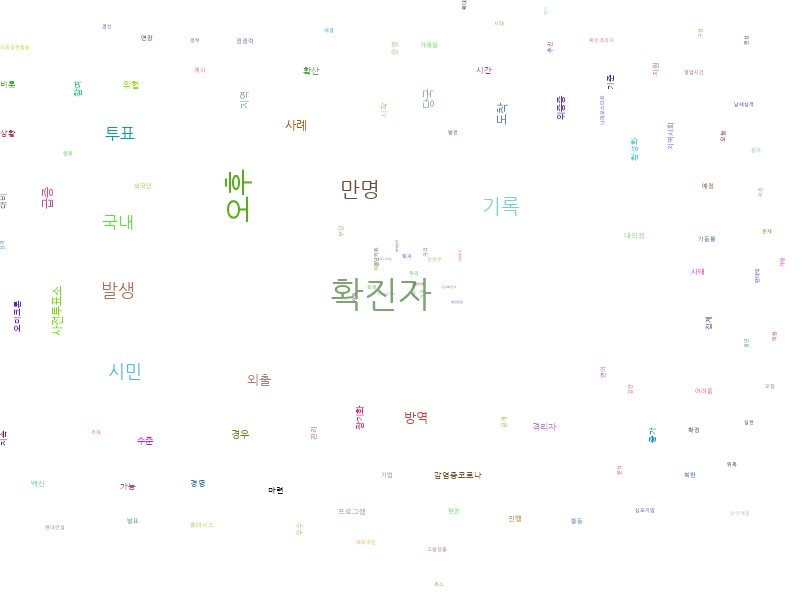

In [22]:
Image(filename='naver_keyword.jpg')